# Question D2

*Question*: Which country do you currently work in?

*Answer Type*: Single Option

*Options*: [All Countries]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

### Basic Analysis

In [3]:
dataframe_obj.df['D2_Country'].head()

0     Brazil
1     Brazil
2     Brazil
3    Germany
4     Brazil
Name: D2_Country, dtype: object

In [4]:
dataframe_obj.df['D2_Country']

0              Brazil
1              Brazil
2              Brazil
3             Germany
4              Brazil
            ...      
271    United Kingdom
272            Brazil
273            Brazil
274            Brazil
275                 0
Name: D2_Country, Length: 276, dtype: object

In [5]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D2_Country')

In [6]:
# barplot data
indexes = list(dataframe_obj.df['D2_Country'].value_counts().index)
values = list(dataframe_obj.df['D2_Country'].value_counts())

In [7]:
# plot object
d2_plot = PlotUtils(pd.DataFrame(
    data={'Countries': indexes, 'Answers': values}
))

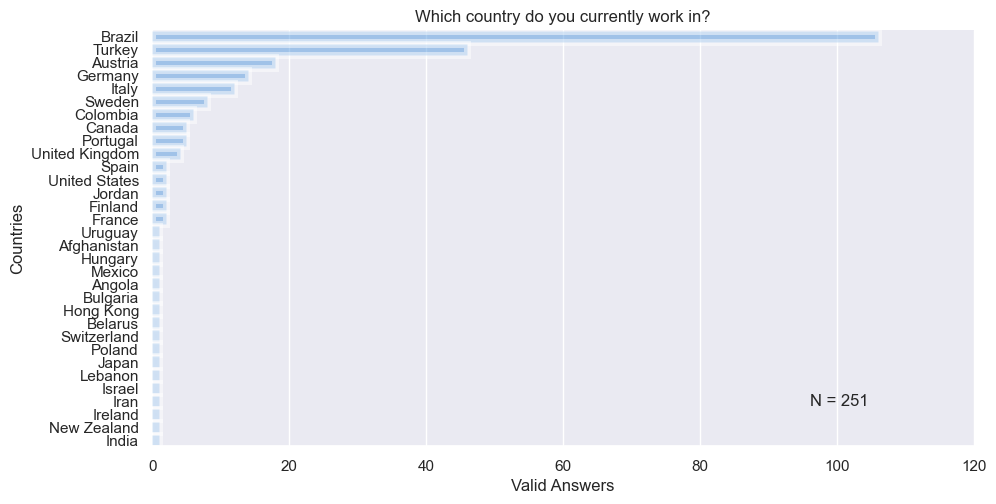

In [9]:
total_answers = 'N = ' + str(len(list(dataframe_obj.df['D2_Country'])))
total_answers_int = len(list(dataframe_obj.df['D2_Country']))

d2_plot.single_barplot(x_axis="Answers", y_axis="Countries", 
                       title="Which country do you currently work in?",
                       x_label="Valid Answers", y_label="Countries", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

In [10]:
valid_options_list = list(dataframe_obj.df['D2_Country'].unique())
valid_answers_list = list(dataframe_obj.df['D2_Country'])

In [11]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [13]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping('single')

In [14]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']

In [16]:
values = [100 * v for v in values]

In [17]:
# plot object for bootstrapped data
d2_boot_plot = PlotUtils(pd.DataFrame(
    data={'Country': indexes, 'Value': values}
).sort_values(by=['Value'], ascending=False))

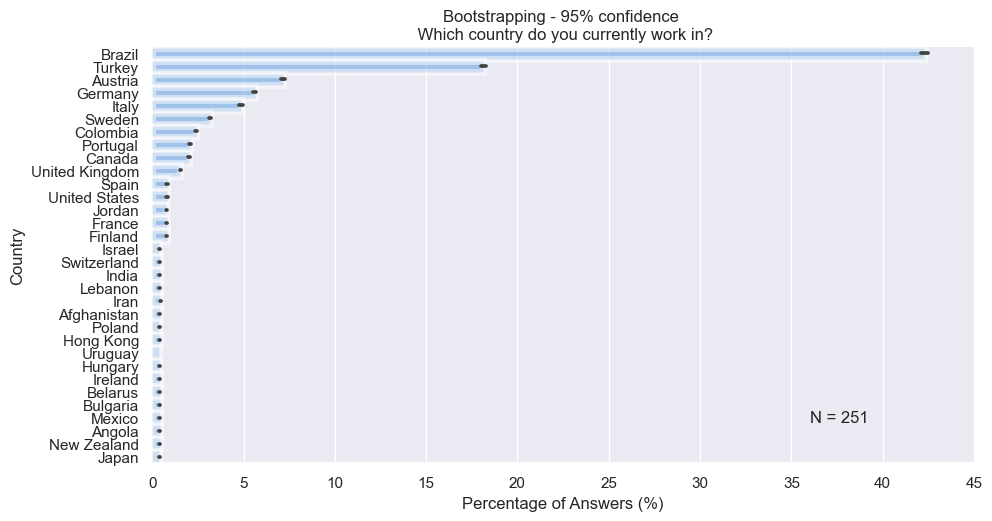

In [18]:
d2_boot_plot.single_barplot(x_axis="Value", y_axis="Country", 
                       title="Bootstrapping - 95% confidence \n Which country do you currently work in?",
                       x_label="Percentage of Answers (%)", y_label="Country", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

In [19]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Brazil:(0.42088526530494513, 0.4228286852589641, 0.4247721052129831)
Germany:(0.05526467553050975, 0.056187250996015944, 0.057109826461522135)
Sweden:(0.030899052829801547, 0.031569721115537845, 0.03224038940127415)
Colombia:(0.023307157390588733, 0.023920318725099605, 0.024533480059610476)
France:(0.0075846599259101226, 0.007912350597609561, 0.008240041269309)
United Kingdom:(0.014962132320009407, 0.015438247011952191, 0.015914361703894975)
Turkey:(0.17983325462663596, 0.18132669322709163, 0.1828201318275473)
New Zealand:(0.0038456335808500024, 0.004091633466135459, 0.004337633351420915)
Finland:(0.007651024407704585, 0.008, 0.008348975592295416)
Italy:(0.047723742159873274, 0.04861354581673308, 0.04950334947359288)
Austria:(0.0705327844321957, 0.0715219123505976, 0.0725110402689995)
Ireland:(0.00380089329438177, 0.004035856573705179, 0.004270819853028587)
Iran:(0.004138683868552704, 0.004382470119521913, 0.004626256370491121)
Canada:(0.0193270